In [1]:
import keras
import pickle
import matplotlib.pyplot as plt
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
file = open('lstm_dataset_test', 'rb')
x_test, y_test = pickle.load(file)
file.close()

In [16]:
model = keras.models.load_model('modelo_9437_9140_9157.h5')
y_pred = model.predict(x_test)

6/6 [==============================] - 1s 83ms/step


In [9]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Parameters
    ----------
    cm : numpy ndarray with 
        matrix with the confusion matrix values returned from scipy
    normalize : Boolen
        wether cm is normalized or not
    title: string
        plot title text
    cmap: string
        matplotlib plt.cm cmap options
        
    Returns
    -------
        None
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[87  8]
 [ 8 87]]
regular 	 0.9157894736842105 %
blink 	 0.9157894736842105 %


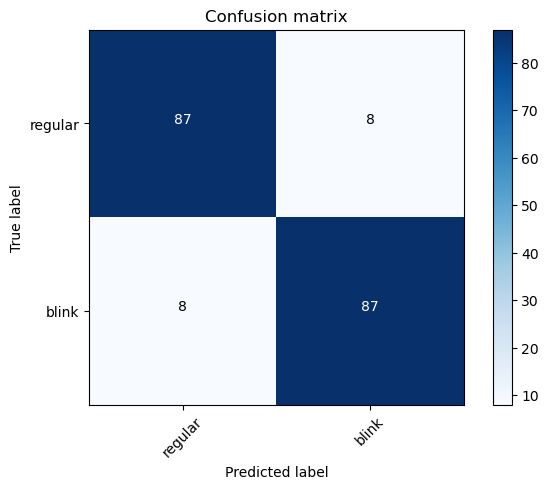

In [17]:
labels_resultado = ['regular', 'blink']
cm = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cm, labels_resultado)
for i in range(2):
    print(f'{labels_resultado[i]} \t {cm[i,i]/cm[i,:].sum()} %')

In [18]:
Tp = cm[1,1]
Tn = cm[0,0]
Fp = cm[0,1]
Fn = cm[1,0]
prec = (Tp)/(Tp + Fp)
rec = (Tp)/(Tp + Fn)

In [19]:
print(f'Accuracy  =  {100*(Tp + Tn)/(Tp+Tn+Fp+Fn)} %')
print(f'Precision =  {100*(Tp)/(Tp + Fp)} %')
print(f'Recal     =  {100*(Tp)/(Tp + Fn)} %')
print(f'F1 Rate   =  {100*2*(prec*rec)/(prec + rec)}')

Accuracy  =  91.57894736842105%
Precision =  91.57894736842105 %
Recal     =  91.57894736842105 %
F1 Rate   =  91.57894736842104


In [20]:
report = classification_report(y_test, y_pred.round(), digits=4)
print(report)

              precision    recall  f1-score   support

         0.0     0.9158    0.9158    0.9158        95
         1.0     0.9158    0.9158    0.9158        95

    accuracy                         0.9158       190
   macro avg     0.9158    0.9158    0.9158       190
weighted avg     0.9158    0.9158    0.9158       190



In [48]:
import nltk
import plotly.express as px
import pandas as pd
import csv

In [6]:
file = open('data_pickles/train_test_val_Human', 'rb')
X_human_train_posTags, X_human_test_posTags, X_human_val_posTags = pickle.load(file)
file.close()

Y_human_train = np.zeros(len(X_human_train_posTags))
Y_human_test = np.zeros(len(X_human_test_posTags))
Y_human_val = np.zeros(len(X_human_val_posTags))


file = open('data_pickles/train_test_val_GPT', 'rb')
X_gpt_train_posTags, X_gpt_test_posTags, X_gpt_val_posTags = pickle.load(file)
file.close()

Y_gpt_train = np.ones(len(X_gpt_train_posTags))
Y_gpt_test = np.ones(len(X_gpt_test_posTags))
Y_gpt_val = np.ones(len(X_gpt_val_posTags))

In [7]:
len(X_human_train_posTags), len(Y_human_train), len(X_human_test_posTags), len(Y_human_test), len(X_human_val_posTags), len(Y_human_val)

(435, 435, 95, 95, 93, 93)

In [8]:
X_train = np.hstack((X_human_train_posTags, X_gpt_train_posTags))
Y_train = np.hstack((Y_human_train, Y_gpt_train))

X_test = np.hstack((X_human_test_posTags, X_gpt_test_posTags))
Y_test = np.hstack((Y_human_test, Y_gpt_test))

X_val = np.hstack((X_human_val_posTags, X_gpt_val_posTags))
Y_val = np.hstack((Y_human_val, Y_gpt_val))

In [9]:
X_train[0]

'Last month a controversial facial recognition company, Clearview AI, announced it had given its technology to the Ukrainian government. The BBC has been given evidence of how it is being used - in more than a thousand cases - to identify both the living and the dead.  This story contains graphic descriptions that may be upsetting to some readers. A man lies motionless on the floor, his head tilted down. His body is naked, apart from a pair of Calvin Klein boxers. His eyes are ringed with what look like bruises. The body was found in Kharkiv, eastern Ukraine - in the wreckage of war. The BBC has seen pictures taken at the scene, but does not know the circumstances around his death. There is clear evidence of head trauma. He also had a tattoo on his left shoulder.  Ukrainian authorities didn\'t know who the man was, so decided to turn to a cutting edge method: facial recognition using artificial intelligence.  Clearview is perhaps the most famous, and controversial, facial recognition s

In [11]:
a = nltk.word_tokenize(X_train[0])

In [20]:
train_tokens = [len(nltk.word_tokenize(text)) for text in X_train]
val_tokens = [len(nltk.word_tokenize(text)) for text in X_val]
test_tokens = [len(nltk.word_tokenize(text)) for text in X_test]


In [62]:
len(train_tokens), len(val_tokens), len(test_tokens), 

(870, 186, 190)

In [42]:
train_tokens_df = pd.DataFrame(train_tokens)
val_tokens_df = pd.DataFrame(val_tokens)
test_tokens_df = pd.DataFrame(test_tokens)


In [43]:
train_tokens_df = train_tokens_df.rename(columns={0: 'Number of Tokens'})
val_tokens_df = val_tokens_df.rename(columns={0: 'Number of Tokens'})
test_tokens_df = test_tokens_df.rename(columns={0: 'Number of Tokens'})

train_tokens_df.head()

,Number of Tokens
0,1641
1,1330
2,597
3,861
4,436


In [53]:
file = 'dataset.csv'
with open(file, 'a', encoding="utf-8") as file:
      writer = csv.writer(file)
    #   writer.writerow(['Number of Tokens', 'set'])
      for n in test_tokens:
        writer.writerow([n, 'Test'])

In [58]:
dataset_df = pd.read_csv("dataset.csv")
dataset_df = dataset_df.rename(columns={'set': 'Set'})

In [59]:
dataset_df.head()

,Number of Tokens,Set
0,1641,Train
1,1330,Train
2,597,Train
3,861,Train
4,436,Train


In [61]:
df = px.data.tips()
fig = px.violin(dataset_df, y='Number of Tokens', x='Set', color='Set', box=True, # draw box plot inside the violin
                points=False # can be 'outliers', or False
               )
fig.show()

In [44]:
df = px.data.tips()
fig = px.violin(val_tokens_df, y='Number of Tokens', box=True, # draw box plot inside the violin
                points=False, # can be 'outliers', or False
               )
fig.show()

In [45]:
df = px.data.tips()
fig = px.violin(test_tokens_df, y='Number of Tokens', box=True, # draw box plot inside the violin
                points=False, # can be 'outliers', or False
               )
fig.show()

In [72]:
months = ['2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12','2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04','2022-05','2022-06','2022-07','2022-08','2022-09','2022-10','2022-11','2022-12','2023-01','2023-02','2023-03','2023-04','2023-05','2023-06','2023-07','2023-08','2023-09']
search = [1,0,1,1,1,0,1,0,0,1,1,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,0,1,2,1,0,0,1,1,1,1,1,2,2,2,1,0,2,2,2,1,2,2,2,1,3,2,2,2,2,2,1,3,3,1,4,5,6,5,6,6,6,7,9,10,21,22,43,66,88,100,93,98,88,99]


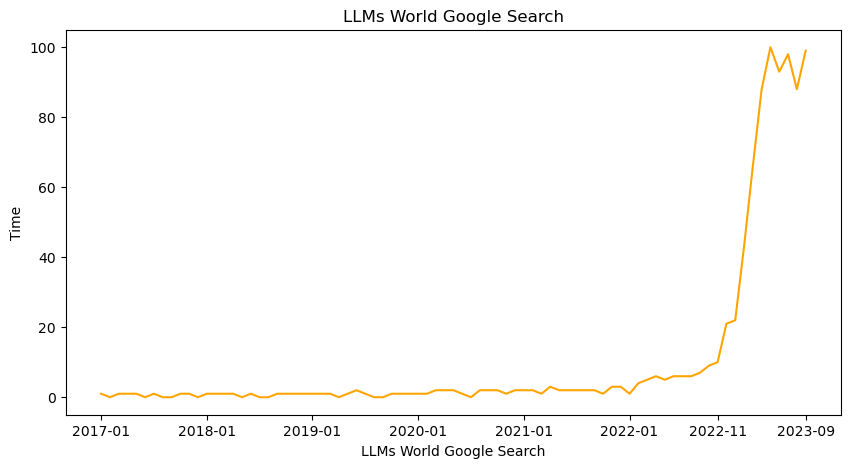

In [83]:
fig = plt.figure(figsize = (10, 5))
 

plt.plot(months, search, color='orange')
plt.xticks(['2017-01', '2018-01', '2019-01', '2020-01', '2021-01', '2022-01', '2022-11', '2023-09'])
 
plt.xlabel("LLMs World Google Search")
plt.ylabel("Time")
plt.title("LLMs World Google Search")
plt.show()